In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import math
import random
import numpy as np
import copy
from deonticAgent import deonticAgent
from virtuousAgent import virtuousAgent
from networkFunctions import *
from plotFunctions import *

In [2]:
#Network parameters
msgUtility = 10
costFactor = 0.1
numNodes = 20
numMsg = 200
myseed = 32
maxEpochs = 10000

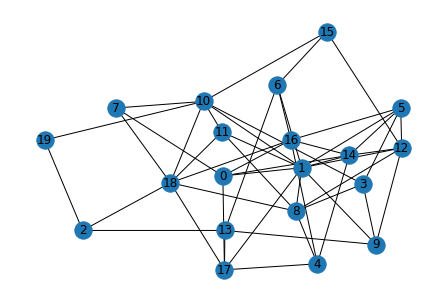

In [3]:
G = nx.erdos_renyi_graph(numNodes, 0.2, seed=myseed)
myPos = nx.spring_layout(G, seed = 40)
nx.draw(G, pos=myPos, with_labels=True)

In [4]:
#graph initialization
def initGraph(G, common_attrs):

    nodeAttr = {}
    for i in range(numNodes):
        temp = {}
        temp['agent'] = virtuousAgent(common_attrs)
        nodeAttr[i] = temp
    nx.set_node_attributes(G, nodeAttr)

    for n in G.nodes():
        neigList = list(G.neighbors(n))
        agent = G.nodes[n]['agent']
        agent.initNeig(neigList)

In [5]:
e = 0
prevStates = []
maxEpochs = 1
common_attrs = {"burnoutThreshold":2*(numMsg*costFactor*msgUtility)/numNodes,"burnoutDrop":2}
initGraph(G, common_attrs)
while e<maxEpochs:
    e+=1
    msgList = createMsgs(numMsg, numNodes, G)  #Message list creation
    prevStates = [copy.deepcopy(G.nodes[i]['agent']) for i in range(numNodes)]
    nf, nd = transmitMsgs(msgList, G)
    print(getNetworkProp(G, "virtuePoints"))
    print(nf, nd)
    curStable = [G.nodes[i]['agent'].isStable(prevStates[i]) for i in range(numNodes)]
    if np.count_nonzero(curStable) == numNodes:
        break
print(e)

[20.0, 22.0, 24.0, 20.0, 22.0, 16.0, 22.0, 22.0, 16.0, 20.0, 22.0, 18.0, 12.0, 20.0, 8.0, 8.0, 14.0, 12.0, 24.0, 22.0]
188 12
1


In [6]:
print(G.nodes[0]['agent'].burnoutCount)
print(G.nodes[0]['agent'].burnoutThreshold)

0
20.0


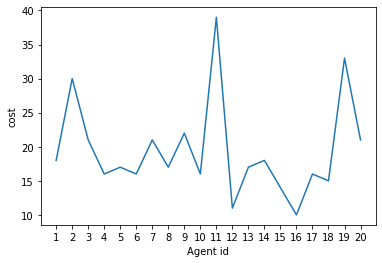

In [7]:
plotAgentwiseProp(G, "cost")

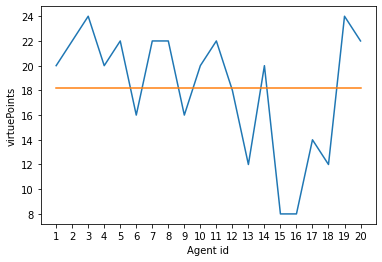

In [8]:
plotAgentwiseProp(G, "virtuePoints", plotMean=True)

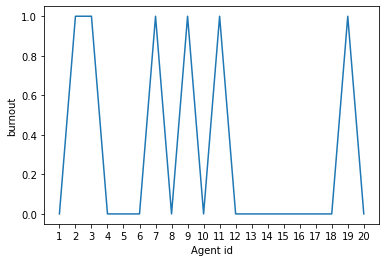

In [9]:
plotAgentwiseProp(G, "burnout")

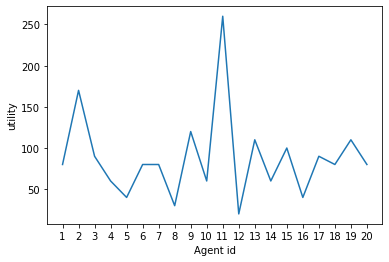

In [10]:
plotAgentwiseProp(G, "utility")